In [1]:
# First, let's import our essential libraries
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import os

# Check if we have GPU access (fingers crossed!)
print("TensorFlow version:", tf.__version__)
print("GPU Available: ", tf.config.list_physical_devices('GPU'))

TensorFlow version: 2.19.0
GPU Available:  [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [2]:
# Install Kaggle API
!pip install kaggle

# Upload your kaggle.json file
from google.colab import files
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [3]:
!mkdir -p ~/.kaggle
!cp 'kaggle.json' ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle competitions list

ref                                                                              deadline             category                reward  teamCount  userHasEntered  
-------------------------------------------------------------------------------  -------------------  ---------------  -------------  ---------  --------------  
https://www.kaggle.com/competitions/arc-prize-2025                               2025-11-03 23:59:00  Featured         1,000,000 Usd        799           False  
https://www.kaggle.com/competitions/openai-gpt-oss-20b-red-teaming               2025-08-26 23:59:00  Featured           500,000 Usd          0           False  
https://www.kaggle.com/competitions/make-data-count-finding-data-references      2025-09-09 23:59:00  Research           100,000 Usd        967           False  
https://www.kaggle.com/competitions/jigsaw-agile-community-rules                 2025-10-24 06:59:00  Featured           100,000 Usd        730           False  
https://www.kaggle.com/compe

In [5]:
# The famous dataset
!kaggle competitions download -c dogs-vs-cats-redux-kernels-edition
!unzip -q dogs-vs-cats-redux-kernels-edition.zip

 95% 774M/814M [00:03<00:00, 144MB/s]
100% 814M/814M [00:03<00:00, 216MB/s]


In [6]:
!ls -la

total 1667608
drwxr-xr-x 1 root root      4096 Aug  9 07:46 .
drwxr-xr-x 1 root root      4096 Aug  9 07:40 ..
drwxr-xr-x 4 root root      4096 Aug  7 13:42 .config
-rw-r--r-- 1 root root 853083403 Dec 11  2019 dogs-vs-cats-redux-kernels-edition.zip
-rw-r--r-- 1 root root        66 Aug  9 07:46 kaggle.json
drwxr-xr-x 1 root root      4096 Aug  7 13:42 sample_data
-rw-r--r-- 1 root root    113903 Dec 11  2019 sample_submission.csv
-rw-r--r-- 1 root root 284478493 Dec 11  2019 test.zip
-rw-r--r-- 1 root root 569918665 Dec 11  2019 train.zip


In [7]:
# Check what's inside
!ls -la train/
!ls -la test/

# Count how many images we have
!echo "Training images:"
!ls train/ | wc -l

!echo "Test images:"
!ls test/ | wc -l

# Look at a few filenames to understand the naming pattern
!ls train/ | head -10

ls: cannot access 'train/': No such file or directory
ls: cannot access 'test/': No such file or directory
Training images:
ls: cannot access 'train/': No such file or directory
0
Test images:
ls: cannot access 'test/': No such file or directory
0
ls: cannot access 'train/': No such file or directory


In [8]:
# Unzip the training data
!unzip -q train.zip

# Unzip the test data
!unzip -q test.zip

# Now let's see what we got
!ls -la

total 1668656
drwxr-xr-x 1 root root      4096 Aug  9 07:46 .
drwxr-xr-x 1 root root      4096 Aug  9 07:40 ..
drwxr-xr-x 4 root root      4096 Aug  7 13:42 .config
-rw-r--r-- 1 root root 853083403 Dec 11  2019 dogs-vs-cats-redux-kernels-edition.zip
-rw-r--r-- 1 root root        66 Aug  9 07:46 kaggle.json
drwxr-xr-x 1 root root      4096 Aug  7 13:42 sample_data
-rw-r--r-- 1 root root    113903 Dec 11  2019 sample_submission.csv
drwxr-xr-x 2 root root    270336 Sep 20  2013 test
-rw-r--r-- 1 root root 284478493 Dec 11  2019 test.zip
drwxr-xr-x 2 root root    794624 Sep 20  2013 train
-rw-r--r-- 1 root root 569918665 Dec 11  2019 train.zip


In [9]:
# Check the structure
!ls -la train/ | head -10
!ls -la test/ | head -10

# Count the images
!echo "Training images:"
!ls train/ | wc -l

!echo "Test images:"
!ls test/ | wc -l

total 609288
drwxr-xr-x 2 root root 794624 Sep 20  2013 .
drwxr-xr-x 1 root root   4096 Aug  9 07:46 ..
-rw-r--r-- 1 root root  12414 Sep 20  2013 cat.0.jpg
-rw-r--r-- 1 root root  21944 Sep 20  2013 cat.10000.jpg
-rw-r--r-- 1 root root  27322 Sep 20  2013 cat.10001.jpg
-rw-r--r-- 1 root root  25723 Sep 20  2013 cat.10002.jpg
-rw-r--r-- 1 root root  28035 Sep 20  2013 cat.10003.jpg
-rw-r--r-- 1 root root  12973 Sep 20  2013 cat.10004.jpg
-rw-r--r-- 1 root root   8245 Sep 20  2013 cat.10005.jpg
total 304264
drwxr-xr-x 2 root root 270336 Sep 20  2013 .
drwxr-xr-x 1 root root   4096 Aug  9 07:46 ..
-rw-r--r-- 1 root root  54902 Sep 20  2013 10000.jpg
-rw-r--r-- 1 root root  21671 Sep 20  2013 10001.jpg
-rw-r--r-- 1 root root  28895 Sep 20  2013 10002.jpg
-rw-r--r-- 1 root root  40146 Sep 20  2013 10003.jpg
-rw-r--r-- 1 root root  21252 Sep 20  2013 10004.jpg
-rw-r--r-- 1 root root   8888 Sep 20  2013 10005.jpg
-rw-r--r-- 1 root root  11972 Sep 20  2013 10006.jpg
Training images:
25000
Tes

Total cats: 12500
Total dogs: 12500


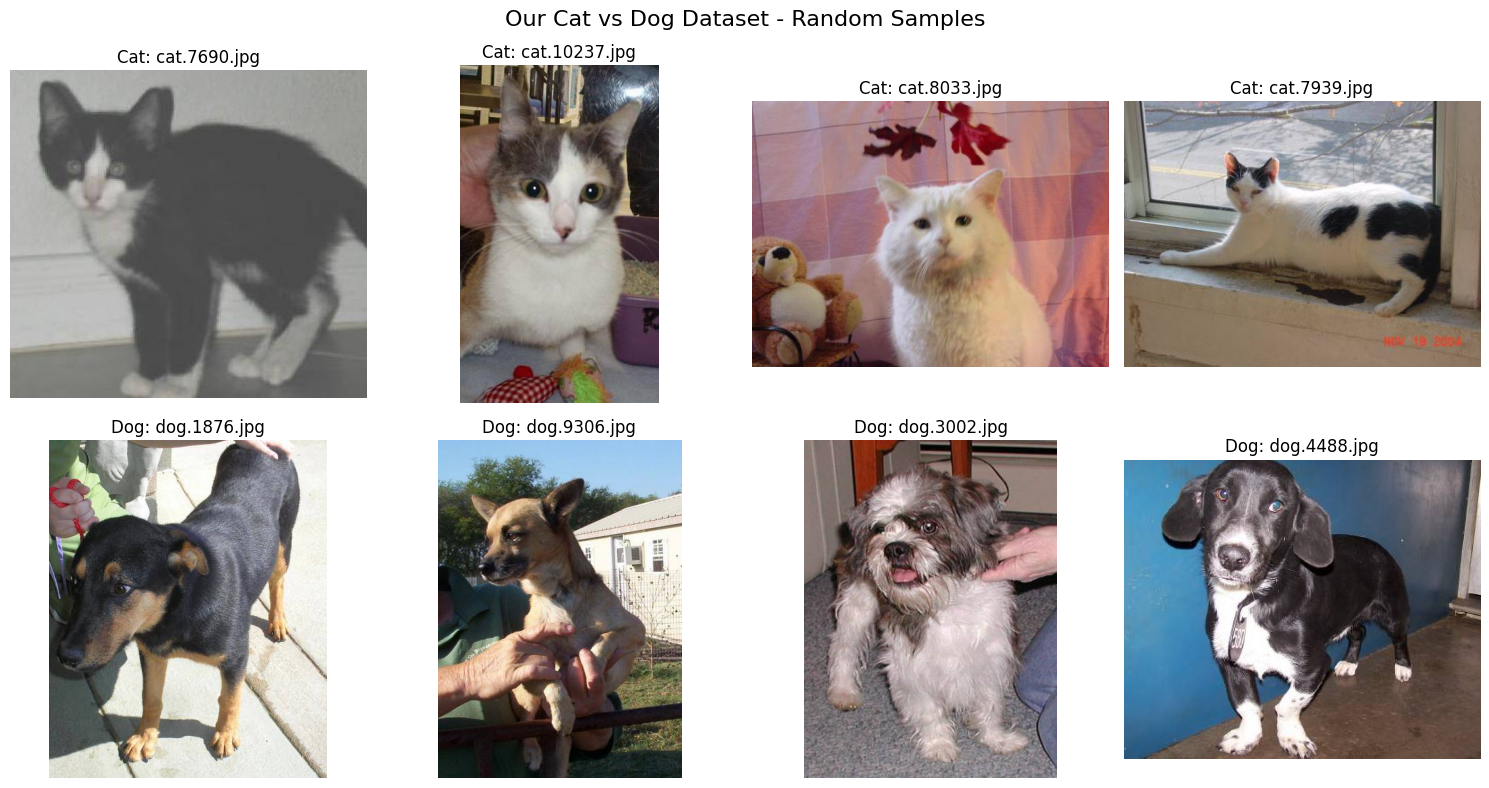

In [10]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import os

train_dir = '/content/train'

cat_files = [f for f in os.listdir(train_dir) if f.startswith('cat.')]
dog_files = [f for f in os.listdir(train_dir) if f.startswith('dog.')]

print(f"Total cats: {len(cat_files)}")
print(f"Total dogs: {len(dog_files)}")

fig, axes = plt.subplots(2, 4, figsize=(15, 8))
fig.suptitle('Our Cat vs Dog Dataset - Random Samples', fontsize=16)


# Show 4 random cats
for i in range(4):
    random_cat = random.choice(cat_files)
    img = mpimg.imread(os.path.join(train_dir, random_cat))
    axes[0, i].imshow(img)
    axes[0, i].set_title(f'Cat: {random_cat}')
    axes[0, i].axis('off')

# Show 4 random dogs
for i in range(4):
    random_dog = random.choice(dog_files)
    img = mpimg.imread(os.path.join(train_dir, random_dog))
    axes[1, i].imshow(img)
    axes[1, i].set_title(f'Dog: {random_dog}')
    axes[1, i].axis('off')


plt.tight_layout()
plt.show()

In [11]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

# Let's set some key parameters
IMG_HEIGHT = 150  # Resize all images to 150x150 (good balance of detail vs speed)
IMG_WIDTH = 150
BATCH_SIZE = 32   # Process 32 images at a time
EPOCHS = 15       # How many times to go through the entire dataset

print(f"Target image size: {IMG_HEIGHT}x{IMG_WIDTH}")
print(f"Batch size: {BATCH_SIZE}")

Target image size: 150x150
Batch size: 32


In [12]:
train_datagen = ImageDataGenerator(
    rescale=1./255,         # Normalize pixel values to 0-1
    rotation_range=20,      # Randomly rotate images
    width_shift_range=0.2,  # Randomly shift images horizontally
    height_shift_range=0.2, # Randomly shift images vertically
    horizontal_flip=True,   # Randomly flip images horizontally
    zoom_range=0.2,        # Randomly zoom in/out
    validation_split=0.2   # Use 20% of data for validation
)

validation_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2 )

In [13]:
import os
import shutil

os.makedirs('/content/train/cats', exist_ok=True)
os.makedirs('/content/train/dogs', exist_ok=True)

train_files = os.listdir('/content/train')

cats_moved = 0
dogs_moved = 0

for filename in train_files:
    if filename.startswith('cat.') and filename.endswith('.jpg'):
        shutil.move(f'/content/train/{filename}', f'/content/train/cats/{filename}')
        cats_moved += 1
    elif filename.startswith('dog.') and filename.endswith('.jpg'):
        shutil.move(f'/content/train/{filename}', f'/content/train/dogs/{filename}')
        dogs_moved += 1

print(f"Moved {cats_moved} cat images")
print(f"Moved {dogs_moved} dog images")

Moved 12500 cat images
Moved 12500 dog images


In [14]:
train_generator = train_datagen.flow_from_directory(
    '/content/train',
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='training'     # Use 80% for training
)

validation_generator = validation_datagen.flow_from_directory(
    '/content/train',
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='validation'   # Use 20% for validation
)

print(f"Training samples: {train_generator.samples}")
print(f"Validation samples: {validation_generator.samples}")
print(f"Classes: {train_generator.class_indices}")

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.
Training samples: 20000
Validation samples: 5000
Classes: {'cats': 0, 'dogs': 1}


In [15]:
# Let's start building our model
from tensorflow.keras import Input

model = models.Sequential([
    # Explicit Input Layer
    Input(shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    # Layer 1: First Convolutional Block
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    # Layer 2: Second Convolutional Block
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    # Layer 3: Third Convolutional Block
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    # Layer 4: Fourth Convolutional Block
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    # Flatten and Dense layers
    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(512, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Binary classification: 0=cat, 1=dog
])

In [16]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [17]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 15, 15, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     3,211,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,453,121 (13.17 MB)

 Trainable params: 3,453,121 (13.17 MB)

 Non-trainable params: 0 (0.00 B)

In [18]:
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=EPOCHS,
    verbose=1
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 145s 220ms/step - accuracy: 0.5383 - loss: 0.6892 - val_accuracy: 0.5416 - val_loss: 0.6811
Epoch 2/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 133s 213ms/step - accuracy: 0.6034 - loss: 0.6596 - val_accuracy: 0.6808 - val_loss: 0.6007
Epoch 3/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 133s 213ms/step - accuracy: 0.6670 - loss: 0.6059 - val_accuracy: 0.7536 - val_loss: 0.5177
Epoch 4/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 130s 207ms/step - accuracy: 0.7086 - loss: 0.5616 - val_accuracy: 0.7436 - val_loss: 0.5167
Epoch 5/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 133s 212ms/step - accuracy: 0.7328 - loss: 0.5337 - val_accuracy: 0.8022 - val_loss: 0.4438
Epoch 6/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 135s 216ms/step - accuracy: 0.7552 - loss: 0.5028 - val_accuracy: 0.8204 - val_loss: 0.3957
Epoch 7/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 132s 211ms/step - accuracy: 0.7789 - loss: 0.4702 - val_accuracy: 0.8414 - val_loss: 0.3808
Epoch 8/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 143s 212ms/step - accuracy: 0.8010 -

In [19]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [20]:
model.save('/content/drive/MyDrive/cat_dog_cnn_model.h5')
print("✅ Model saved successfully to Google Drive!")

✅ Model saved successfully to Google Drive!


In [21]:
model.save_weights('/content/drive/MyDrive/cat_dog_.weights.h5')
print("✅ Model weights saved successfully!")

✅ Model weights saved successfully!


In [22]:
import pickle
with open('/content/drive/MyDrive/training_history.pkl', 'wb') as f:
    pickle.dump(history.history, f)

Saving 653e48c2236dc5b7d77e1687e5a91c3b.jpg to 653e48c2236dc5b7d77e1687e5a91c3b.jpg
Testing 653e48c2236dc5b7d77e1687e5a91c3b.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step    


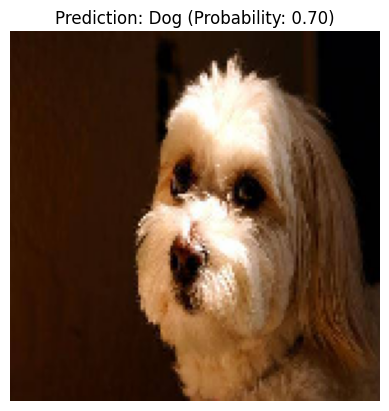

In [23]:
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt


def predict_cat_or_dog(img_path):
  img = image.load_img(img_path, target_size=(150, 150))
  img_array = image.img_to_array(img)
  img_array = np.expand_dims(img_array, axis=0)
  img_array /= 255.0

  prediction = model.predict(img_array)
  probability = prediction[0][0]

  plt.imshow(img)
  plt.axis('off')

  if probability > 0.5:
    plt.title(f"Prediction: Dog (Probability: {probability:.2f})")
  else:
    plt.title(f"Prediction: Cat (Probability: {1 - probability:.2f})")

  plt.show()
  return probability

from google.colab import files
uploaded = files.upload()

for filename in uploaded.keys():
  print(f"Testing {filename}")
  predict_cat_or_dog(filename)

Saving 001a5f3114548acdefa3d4da05474c2e.jpg to 001a5f3114548acdefa3d4da05474c2e.jpg
Testing 001a5f3114548acdefa3d4da05474c2e.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 906ms/step


/tmp/ipython-input-1710074851.py:40: UserWarning: Glyph 128054 (\N{DOG FACE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128054 (\N{DOG FACE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


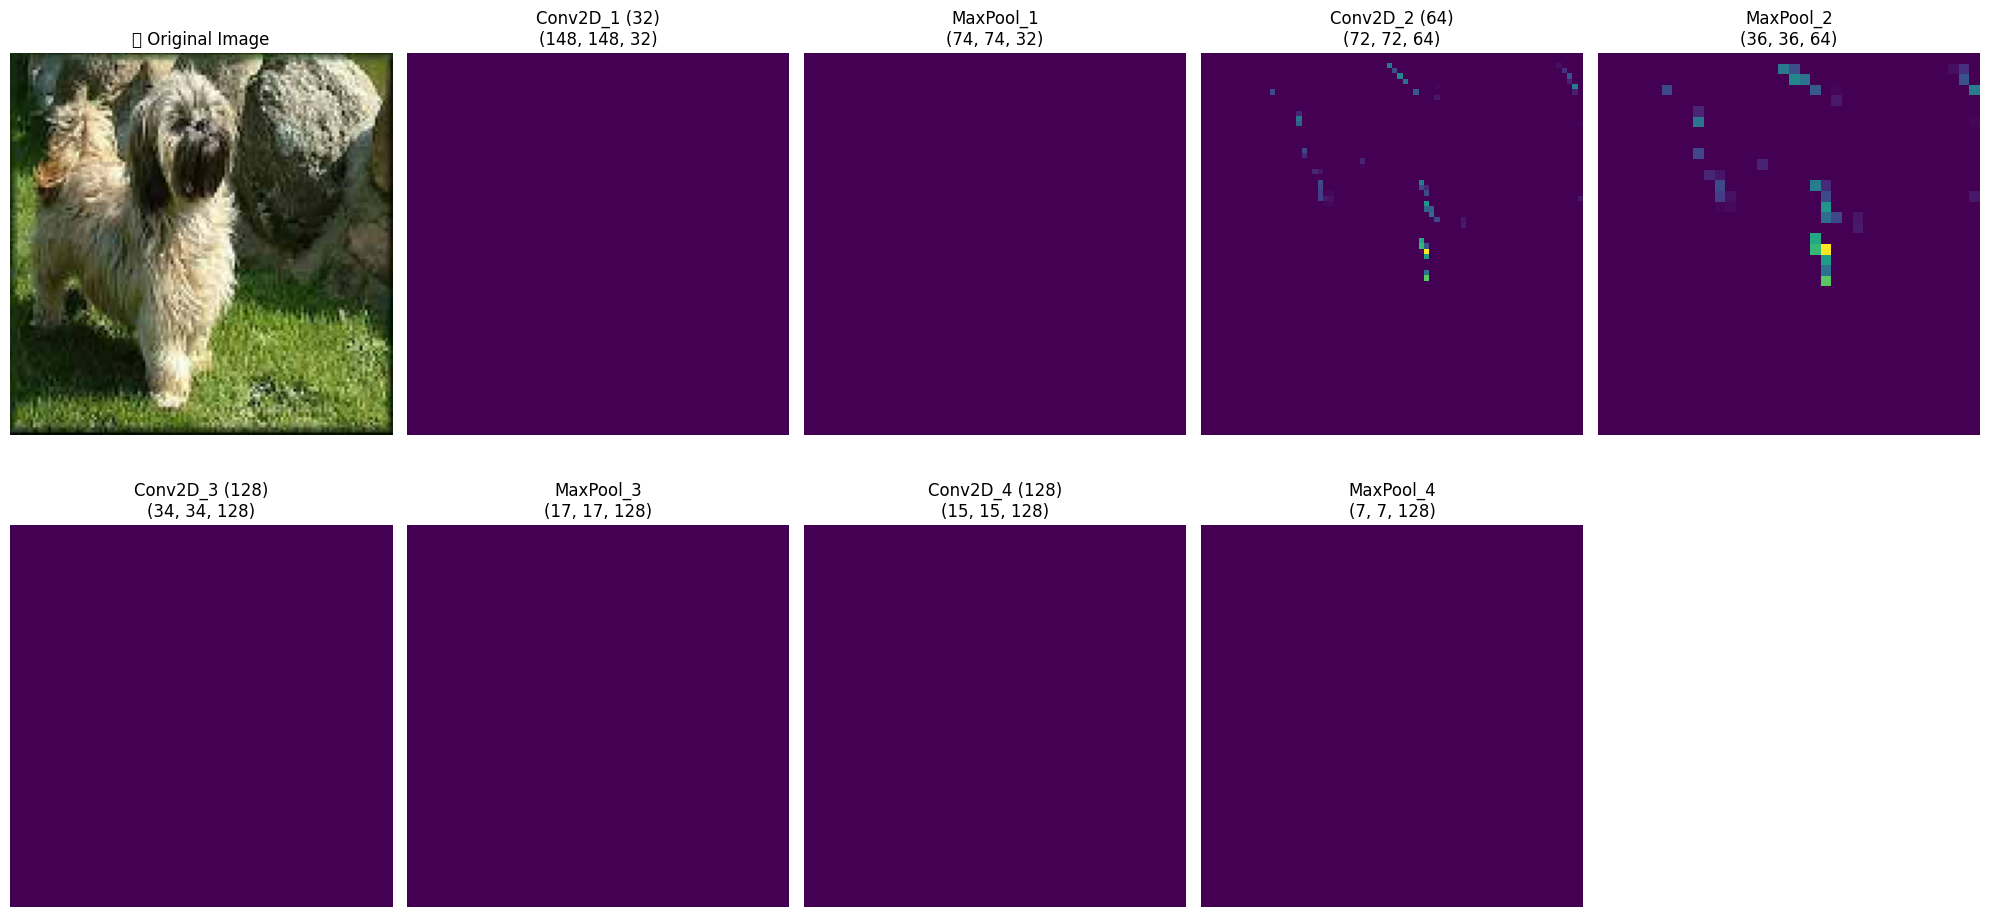

Feature map shapes:
Conv2D_1 (32): (1, 148, 148, 32)
MaxPool_1: (1, 74, 74, 32)
Conv2D_2 (64): (1, 72, 72, 64)
MaxPool_2: (1, 36, 36, 64)
Conv2D_3 (128): (1, 34, 34, 128)
MaxPool_3: (1, 17, 17, 128)
Conv2D_4 (128): (1, 15, 15, 128)
MaxPool_4: (1, 7, 7, 128)


In [27]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras import Model
from tensorflow.keras.preprocessing import image

# Create the visualization model using the working input
layer_outputs = [layer.output for layer in model.layers[:8]]
activation_model = Model(inputs=model.layers[0].input, outputs=layer_outputs)

def visualize_feature_maps(img_path):
    # Preprocess image
    img = image.load_img(img_path, target_size=(150, 150))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0

    # Get activations
    activations = activation_model.predict(img_array)

    plt.figure(figsize=(20, 10))

    # Show original
    plt.subplot(2, 5, 1)
    plt.imshow(img)
    plt.title('🐶 Original Image')
    plt.axis('off')

    # Layer names
    layer_names = ['Conv2D_1 (32)', 'MaxPool_1', 'Conv2D_2 (64)', 'MaxPool_2',
                   'Conv2D_3 (128)', 'MaxPool_3', 'Conv2D_4 (128)', 'MaxPool_4']

    # Show feature maps
    for i, (activation, name) in enumerate(zip(activations, layer_names)):
        if i < 8:  # Show first 8
            plt.subplot(2, 5, i+2)
            plt.imshow(activation[0, :, :, 0], cmap='viridis')
            plt.title(f'{name}\n{activation.shape[1:]}')
            plt.axis('off')

    plt.tight_layout()
    plt.show()

    print("Feature map shapes:")
    for name, activation in zip(layer_names, activations):
        print(f"{name}: {activation.shape}")

from google.colab import files
uploaded = files.upload()

for filename in uploaded.keys():
  print(f"Testing {filename}")
  visualize_feature_maps(filename)

# Try it!


Testing 001a5f3114548acdefa3d4da05474c2e.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


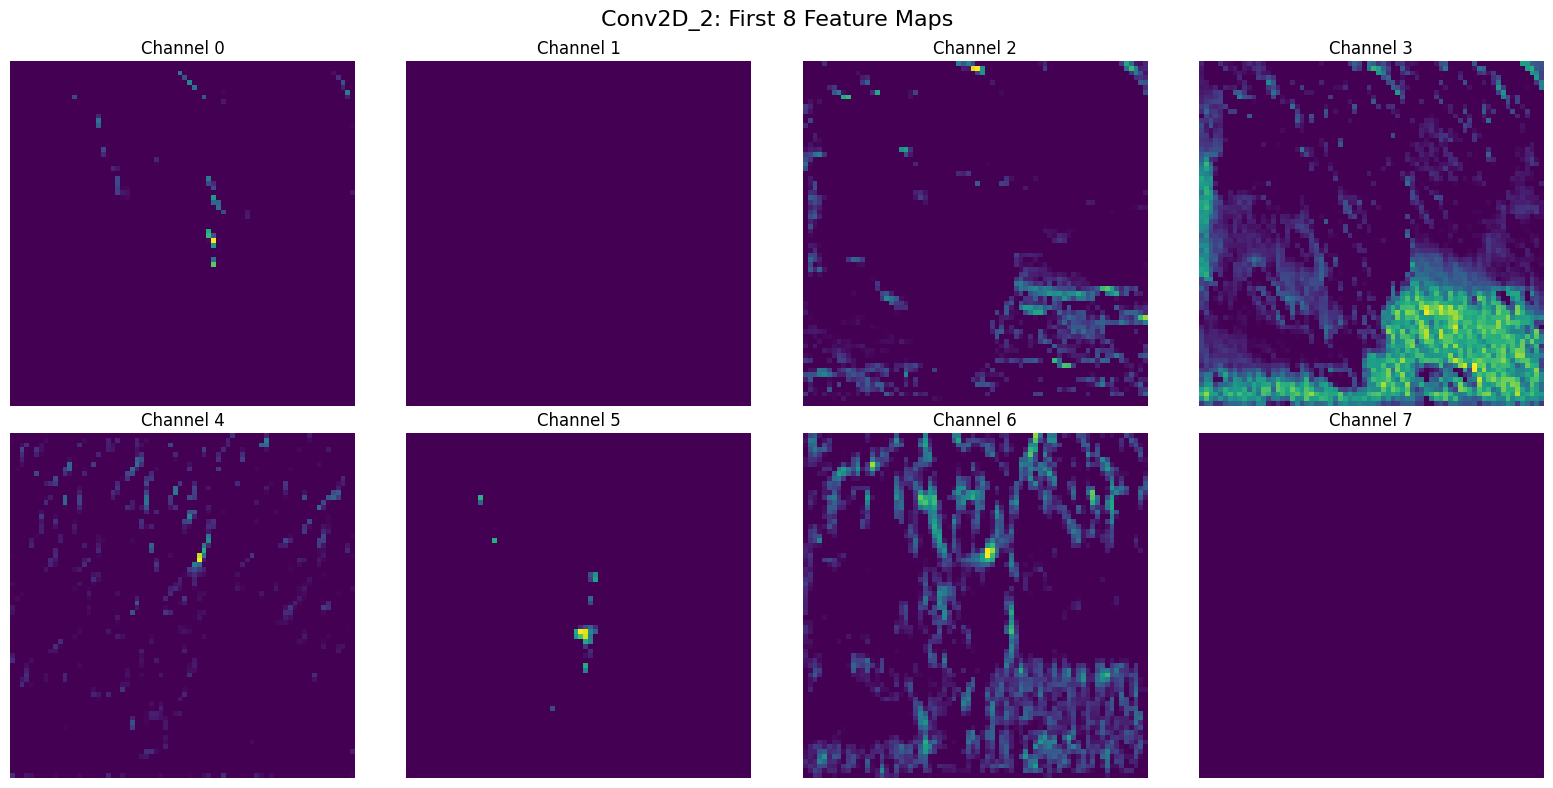

In [28]:
# Let's see multiple channels from Conv2D_2 (where you saw patterns!)
def show_multiple_channels(img_path, layer_index=2, num_channels=8):
    img = image.load_img(img_path, target_size=(150, 150))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0

    activations = activation_model.predict(img_array)
    target_activation = activations[layer_index]  # Conv2D_2

    plt.figure(figsize=(16, 8))
    plt.suptitle(f'Conv2D_2: First {num_channels} Feature Maps', fontsize=16)

    for i in range(num_channels):
        plt.subplot(2, 4, i+1)
        plt.imshow(target_activation[0, :, :, i], cmap='viridis')
        plt.title(f'Channel {i}')
        plt.axis('off')

    plt.tight_layout()
    plt.show()

for filename in uploaded.keys():
  print(f"Testing {filename}")
  show_multiple_channels(filename)

In [29]:
from google.colab import drive
drive.mount('/content/drive')

from tensorflow.keras.models import load_model
model = load_model('/content/drive/MyDrive/cat_dog_cnn_model.h5')
print("✅ Model loaded successfully!")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


✅ Model loaded successfully!


In [30]:
import numpy as np
test_input = np.random.random((1, 150, 150, 3))
test_pred = model.predict(test_input)
print(f"✅ Model working! Test prediction: {test_pred[0][0]:.3f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step
✅ Model working! Test prediction: 0.461
